In [2]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from hidden import dynamics
from hidden import infer

sns.set(style='darkgrid')

proj_dir = Path().resolve().parents[1]
plot_dir = proj_dir / "reports" / "figures"


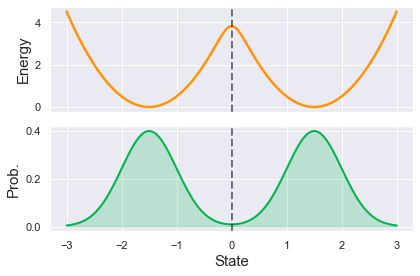

In [30]:
# First, we want to generate the coarse-graining plot, which is just a bistable
# well with a dashed line for the transition state

x_data = np.linspace(-3.0, 3.0, 500)
y_data = -1 * np.log(np.exp(-2*(x_data - 1.5)**2) + np.exp(-2*(x_data + 1.5)**2))
dX = x_data[1] - x_data[0]

eq_dist_tot = np.exp(-1 * y_data)
eq_dist_m1 = np.exp(-2 * (x_data + 1) ** 2)
eq_dist_p1 = np.exp(-2 * (x_data - 1) ** 2)

eq_dist_tot = eq_dist_tot / (np.sum(eq_dist_tot) * dX)
eq_dist_m1 = eq_dist_m1 / (np.sum(eq_dist_m1) * dX)
eq_dist_p1 = eq_dist_p1 / (np.sum(eq_dist_p1) * dX)

fig, ax = plt.subplots(2, 1, figsize=(6, 4.0), sharex=True)

ax[1].fill_between(x_data, eq_dist_tot, y2=0, color=sns.xkcd_rgb["shamrock"], alpha=0.2)
ax[1].plot(x_data, eq_dist_tot, linewidth=2.0, color=sns.xkcd_rgb["shamrock"])
ax[0].plot(x_data, y_data, linewidth=2.5, color=sns.xkcd_rgb["tangerine"])

ax[0].axvline(0, linewidth=2.0, color='k', linestyle='--', alpha=0.6)
ax[1].axvline(0, linewidth=2.0, color='k', linestyle='--', alpha=0.6)

ax[1].set_xlabel(r"State", fontsize=15)
ax[1].set_ylabel(r"Prob.", fontsize=15)
ax[0].set_ylabel(r"Energy", fontsize=15)

plt.tight_layout()
plt.savefig(plot_dir / "bistable_schematic.pdf")
plt.show()


In [62]:
# And then for the filtered estiamtes
hmm = dynamics.HMM(2, 2)
hmm.init_uniform_cycle(0.1, 0.2)
hmm.run_dynamics(100)

In [63]:
obs_ts = hmm.obs_ts
state_ts = hmm.state_ts

In [64]:
analyzer = infer.MarkovInfer(2, 2)

In [65]:
analyzer.forward_algo(obs_ts, hmm.A, hmm.B)

In [66]:
analyzer.backward_algo(obs_ts, hmm.A, hmm.B)
analyzer.bayesian_smooth(obs_ts, hmm.A, hmm.B)

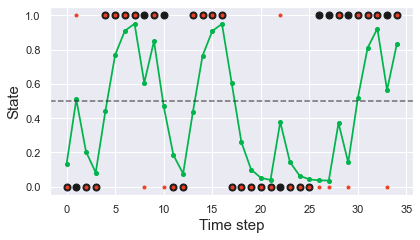

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))

fwd_p1 = [p[1] for p in analyzer.forward_tracker]

ax.plot(state_ts[7: 42], 'o', markersize=7, color='k')
ax.plot(obs_ts[7: 42], 'o', markersize=3, color=sns.xkcd_rgb["tomato"])
ax.plot(fwd_p1[7:42], linewidth=1.75, color=sns.xkcd_rgb["shamrock"])
ax.plot(fwd_p1[7:42], 'o', markersize=4, color=sns.xkcd_rgb["shamrock"])

ax.axhline(0.5, linewidth=1.5, color='k', alpha=0.6, linestyle='--')

ax.set_xlabel(r"Time step", fontsize=15)
ax.set_ylabel(r"State", fontsize=15)
plt.tight_layout()
plt.savefig(plot_dir / "fwd_filter.pdf")
plt.show()


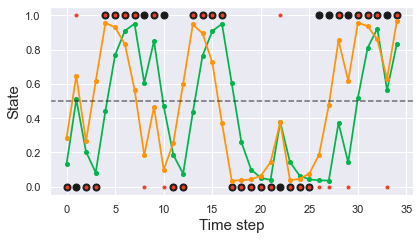

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))

fwd_p1 = [p[1] for p in analyzer.forward_tracker]
back_p1 = [p[1] for p in analyzer.backward_tracker]

ax.plot(state_ts[7: 42], 'o', markersize=7, color='k')
ax.plot(obs_ts[7: 42], 'o', markersize=3, color=sns.xkcd_rgb["tomato"])

ax.plot(fwd_p1[7:42], linewidth=1.75, color=sns.xkcd_rgb["shamrock"])
ax.plot(fwd_p1[7:42], 'o', markersize=4, color=sns.xkcd_rgb["shamrock"])

ax.plot(back_p1[7:42], linewidth=1.75, color=sns.xkcd_rgb["tangerine"])
ax.plot(back_p1[7:42], 'o', markersize=4, color=sns.xkcd_rgb["tangerine"])

ax.axhline(0.5, linewidth=1.5, color='k', alpha=0.6, linestyle='--')

ax.set_xlabel(r"Time step", fontsize=15)
ax.set_ylabel(r"State", fontsize=15)
plt.tight_layout()
plt.savefig(plot_dir / "fwd_back_filter.pdf")
plt.show()

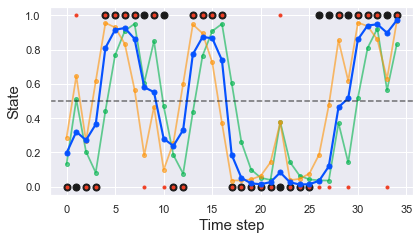

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))

fwd_p1 = [p[1] for p in analyzer.forward_tracker]
back_p1 = [p[1] for p in analyzer.backward_tracker]
bayes_p1 = [p[1] for p in analyzer.bayes_smooth]

ax.plot(state_ts[7: 42], 'o', markersize=7, color='k')
ax.plot(obs_ts[7: 42], 'o', markersize=3, color=sns.xkcd_rgb["tomato"])

ax.plot(fwd_p1[7:42], linewidth=1.75, color=sns.xkcd_rgb["shamrock"], alpha=0.6)
ax.plot(fwd_p1[7:42], 'o', markersize=4, color=sns.xkcd_rgb["shamrock"], alpha=0.6)

ax.plot(back_p1[7:42], linewidth=1.75, color=sns.xkcd_rgb["tangerine"], alpha=0.6)
ax.plot(back_p1[7:42], 'o', markersize=4, color=sns.xkcd_rgb["tangerine"], alpha=0.6)

ax.plot(bayes_p1[7:42], linewidth=2.15, color=sns.xkcd_rgb["electric blue"])
ax.plot(bayes_p1[7:42], 'o', markersize=5, color=sns.xkcd_rgb["electric blue"])

ax.axhline(0.5, linewidth=1.5, color='k', alpha=0.6, linestyle='--')

ax.set_xlabel(r"Time step", fontsize=15)
ax.set_ylabel(r"State", fontsize=15)
plt.tight_layout()
plt.savefig(plot_dir / "bayes_filter.pdf")
plt.show()

In [93]:
# Chart of error rate as of all filters (and naive) as a function of
# observation noise (for a fixed transition rate)

hmm_set = [dynamics.HMM(2, 2) for _ in range(25)]
analyzer_set = [infer.MarkovInfer(2, 2) for _ in range(25)]

obs_noise = np.linspace(0.05, 0.4, 25)
for hmm, noise in zip(hmm_set, obs_noise):
    hmm.init_uniform_cycle(0.1, noise)


In [94]:
state_set, obs_set = [], []
err_rates_naive = []
err_rates_fwd = []
err_rates_back = []
err_rates_bayes = []

for hmm, analyzer in zip(hmm_set, analyzer_set):
    hmm.run_dynamics(50000)
    state_set.append(hmm.state_ts)
    obs_set.append(hmm.obs_ts)
    analyzer.forward_algo(hmm.obs_ts, hmm.A, hmm.B)
    analyzer.backward_algo(hmm.obs_ts, hmm.A, hmm.B)
    analyzer.bayesian_smooth(hmm.obs_ts, hmm.A, hmm.B)

    error_naive = analyzer.error_rate(hmm.obs_ts, hmm.state_ts)
    pred_fwd = [np.argmax(p) for p in analyzer.forward_tracker]
    pred_back = [np.argmax(p) for p in analyzer.backward_tracker]
    pred_bayes = [np.argmax(p) for p in analyzer.bayes_smooth]

    error_fwd = analyzer.error_rate(pred_fwd, hmm.state_ts)
    error_back = analyzer.error_rate(pred_back, hmm.state_ts)
    error_bayes = analyzer.error_rate(pred_bayes, hmm.state_ts)

    err_rates_naive.append(error_naive)
    err_rates_fwd.append(error_fwd)
    err_rates_back.append(error_back)
    err_rates_bayes.append(error_bayes)



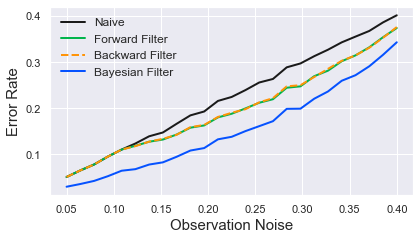

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))

ax.plot(obs_noise, err_rates_naive, linewidth=2.0, color='k', label="Naive")
ax.plot(obs_noise, err_rates_fwd, linewidth=2.0, color=sns.xkcd_rgb["shamrock"], label="Forward Filter")
ax.plot(obs_noise, err_rates_back, linewidth=2.0, color=sns.xkcd_rgb["tangerine"], label="Backward Filter", linestyle='--')
ax.plot(obs_noise, err_rates_bayes, linewidth=2.0, color=sns.xkcd_rgb["electric blue"], label="Bayesian Filter")

ax.set_xlabel(r"Observation Noise", fontsize=15)
ax.set_ylabel(r"Error Rate", fontsize=15)
ax.legend(fontsize=12, frameon=False)
plt.tight_layout()
plt.savefig(plot_dir / "error_rate_trend.pdf")
plt.show()

In [119]:
# Forward and backward alpha/beta probabilities
hmm = dynamics.HMM(2, 2)
hmm.init_uniform_cycle(0.1, 0.2)
hmm.run_dynamics(150)

obs_ts = hmm.obs_ts
state_ts = hmm.state_ts


In [120]:
analyzer = infer.MarkovInfer(2, 2)

In [121]:
analyzer.alpha(obs_ts, hmm.A, hmm.B)
analyzer.beta(obs_ts, hmm.A, hmm.B)

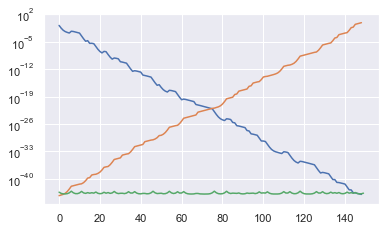

In [122]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))

ax.plot(analyzer.alpha_tracker[1:, 0])
ax.plot(analyzer.beta_tracker[:-1, 0])
ax.plot(analyzer.beta_tracker.sum(axis=1) * analyzer.alpha_tracker.sum(axis=1))

ax.set_yscale("log")
